# Análisis del dataset Bank Marketing del repositorio UCI

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## Carga del Dataset

In [413]:
#from ucimlrepo import fetch_ucirepo 

# fetch dataset 
#bank_marketing = fetch_ucirepo(id=222) 

# data (as pandas dataframes) 
#X = bank_marketing.data.features 
#y = bank_marketing.data.targets 


In [414]:
import pandas as pd # trabajo con dataframe
import seaborn as sns # ploteos sencillos
import matplotlib.pyplot as plt #ploteos clásicos

#df = X.copy()
#df['target'] = y
#df = pd.concat([X, y], axis = 1) 
#df.to_csv('bank_marketing.csv', index=False) # Guardar como CSV
#df.head()

In [415]:
df = pd.read_csv('bank_marketing.csv') # importación de csv
df.head() #muestra de los primeros elementos

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [416]:
df.info() #información de dataframe (tipos de datos, cantidad de instancias)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  target       45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Preprocesamiento

In [417]:
df = df.dropna() # eliminar nulos

if df.duplicated().sum()>0: 
    df = df.drop_duplicates() #eliminar duplicados
    print("Duplicados eliminados")
else:
    print("No hay duplicados")

df.info()

No hay duplicados
<class 'pandas.core.frame.DataFrame'>
Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          7842 non-null   int64 
 1   job          7842 non-null   object
 2   marital      7842 non-null   object
 3   education    7842 non-null   object
 4   default      7842 non-null   object
 5   balance      7842 non-null   int64 
 6   housing      7842 non-null   object
 7   loan         7842 non-null   object
 8   contact      7842 non-null   object
 9   day_of_week  7842 non-null   int64 
 10  month        7842 non-null   object
 11  duration     7842 non-null   int64 
 12  campaign     7842 non-null   int64 
 13  pdays        7842 non-null   int64 
 14  previous     7842 non-null   int64 
 15  poutcome     7842 non-null   object
 16  target       7842 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [418]:
df['target'].value_counts() #conteo por columna objetivo

target
no     6056
yes    1786
Name: count, dtype: int64

In [419]:
#oneHot = pd.get_dummies(df)
#oneHot.info()

## Análisis Exploratorio de Datos

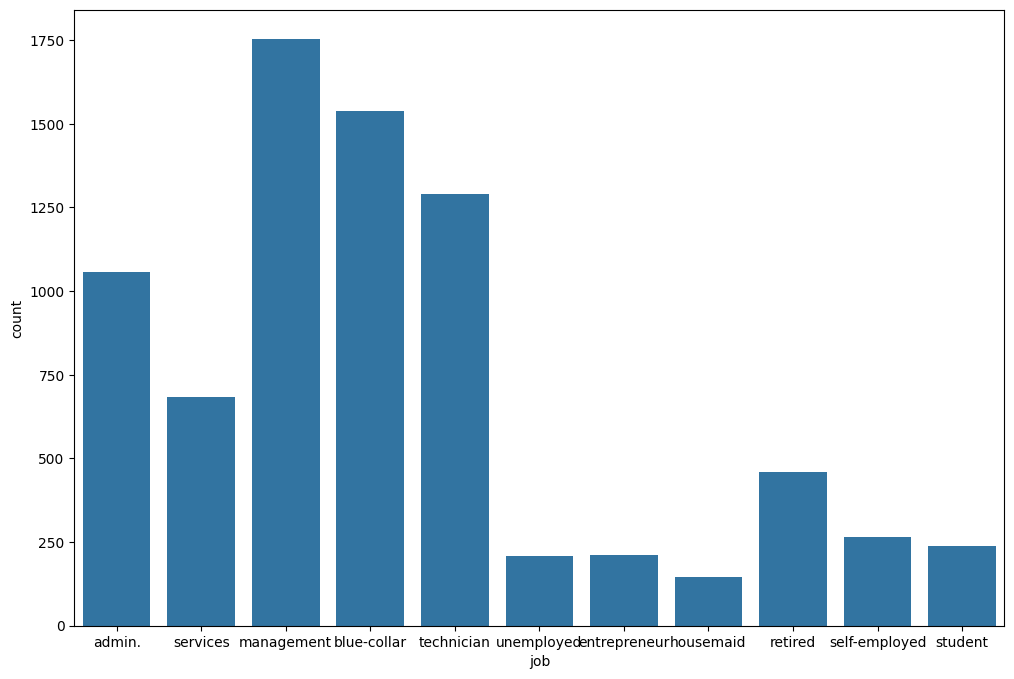

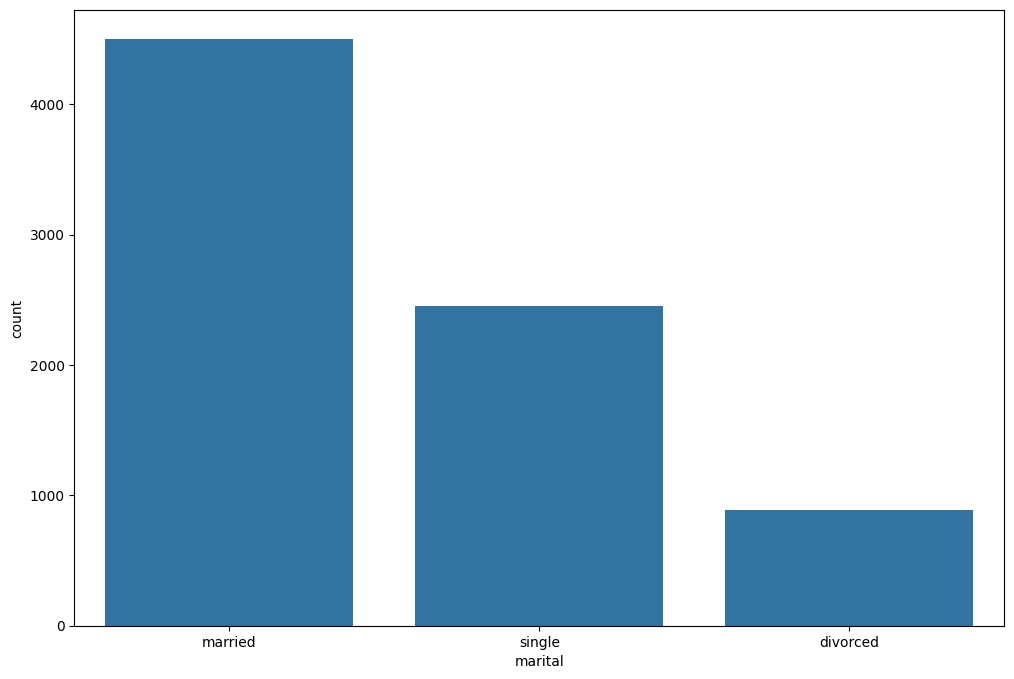

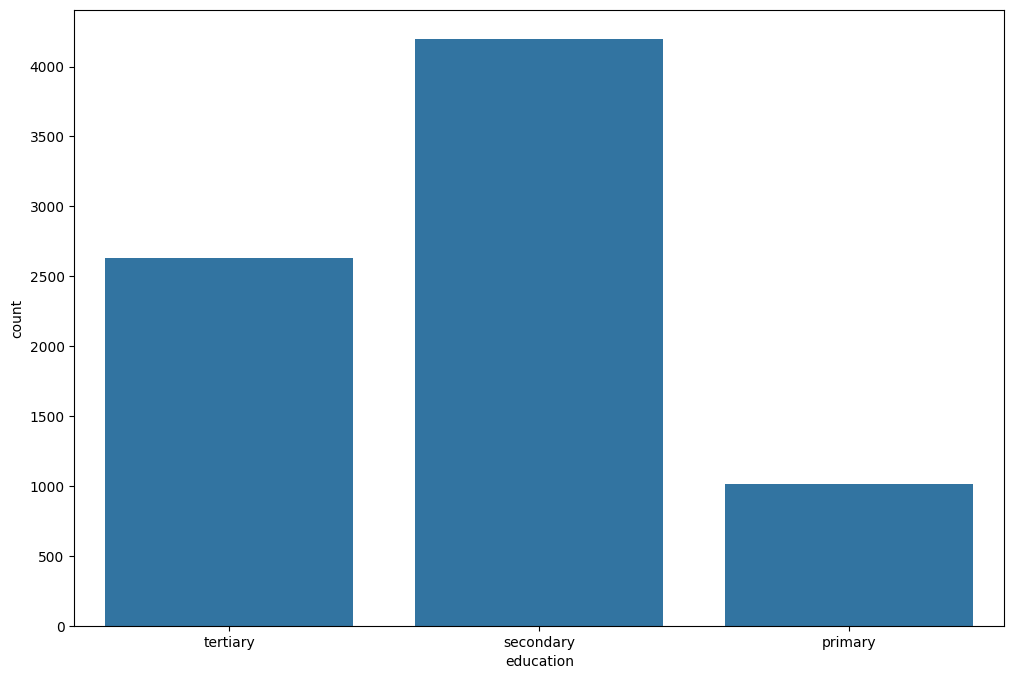

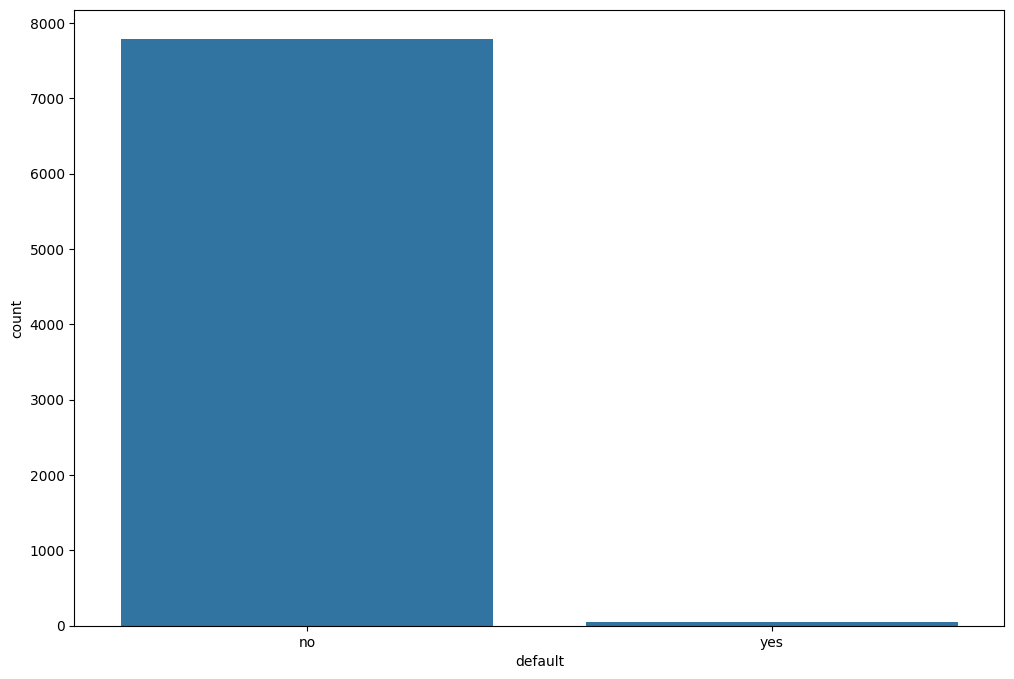

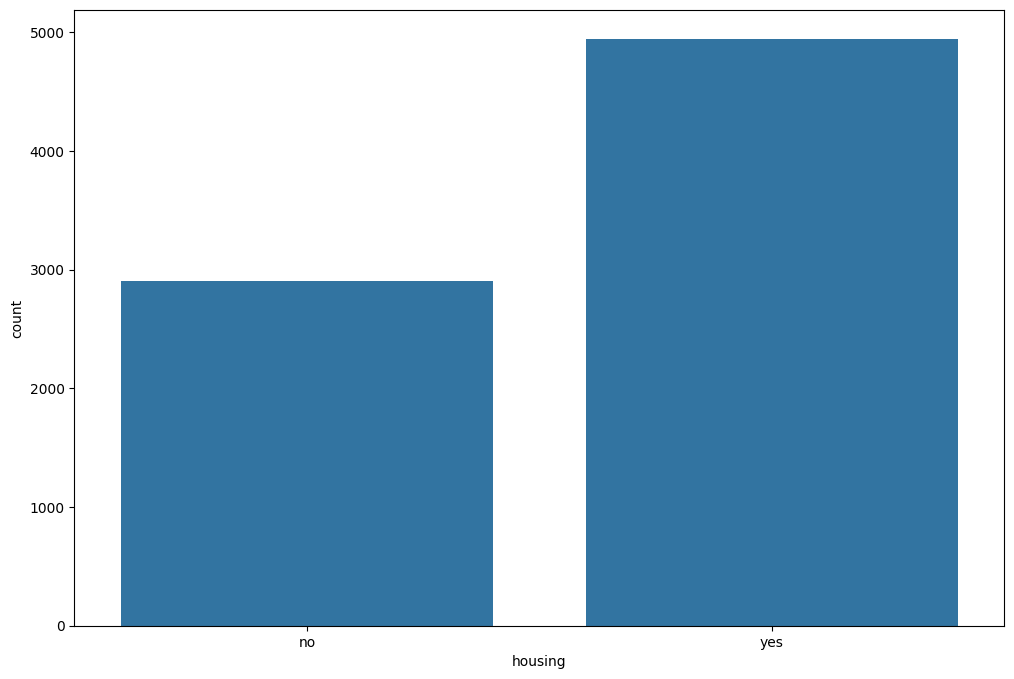

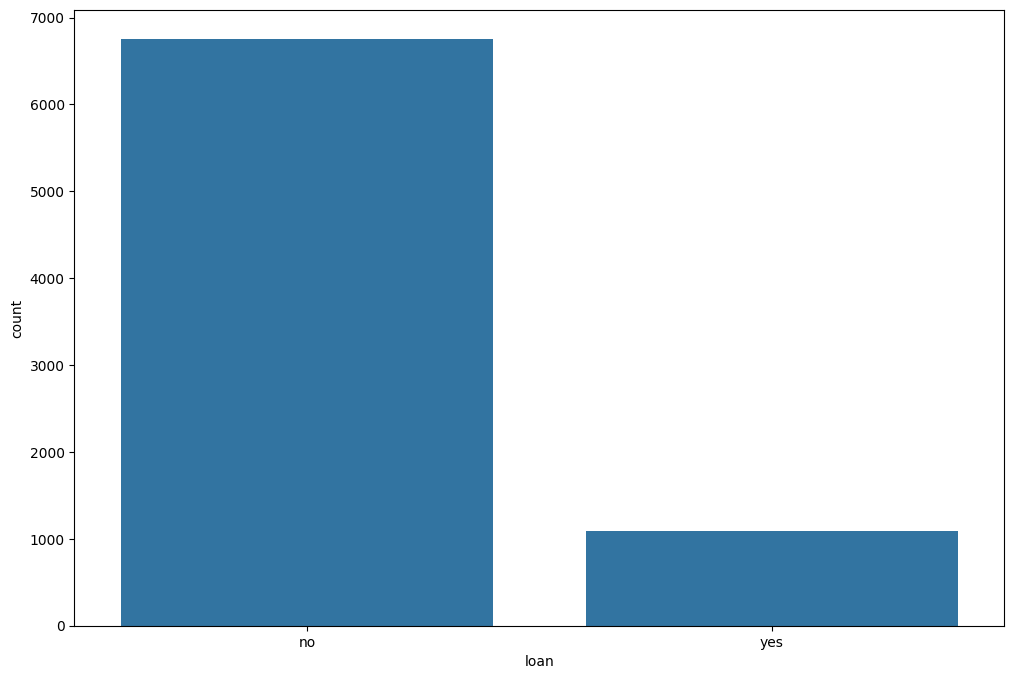

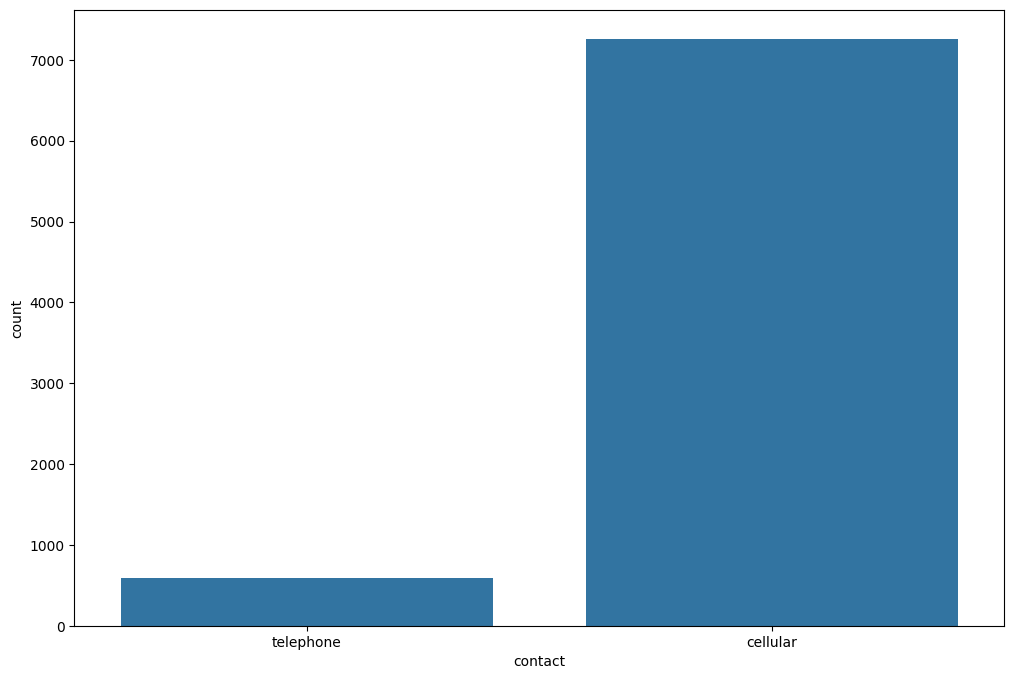

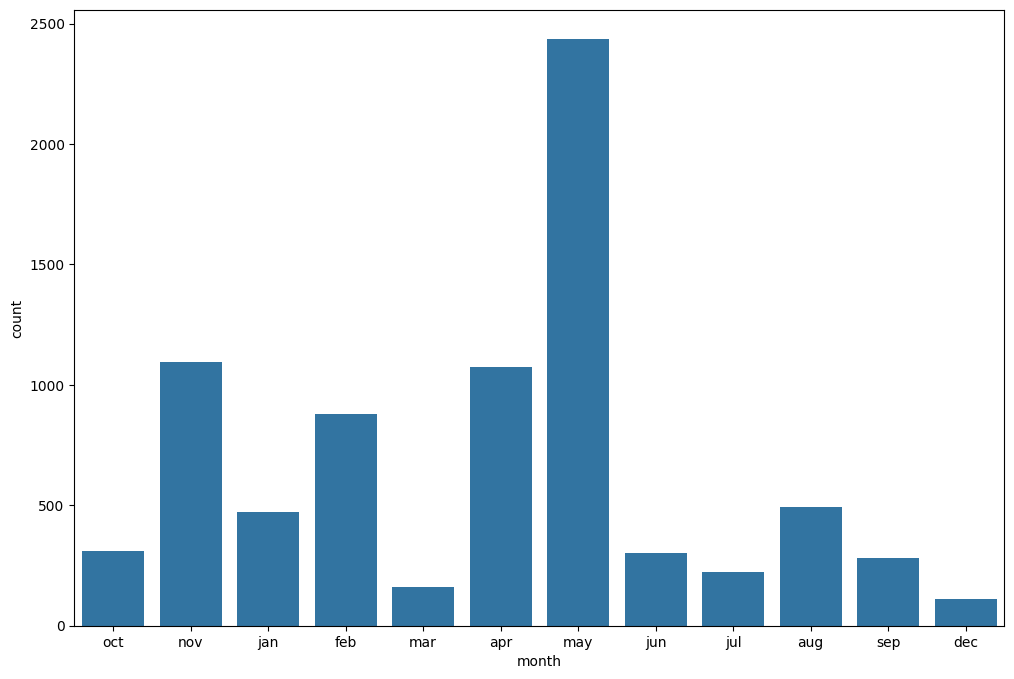

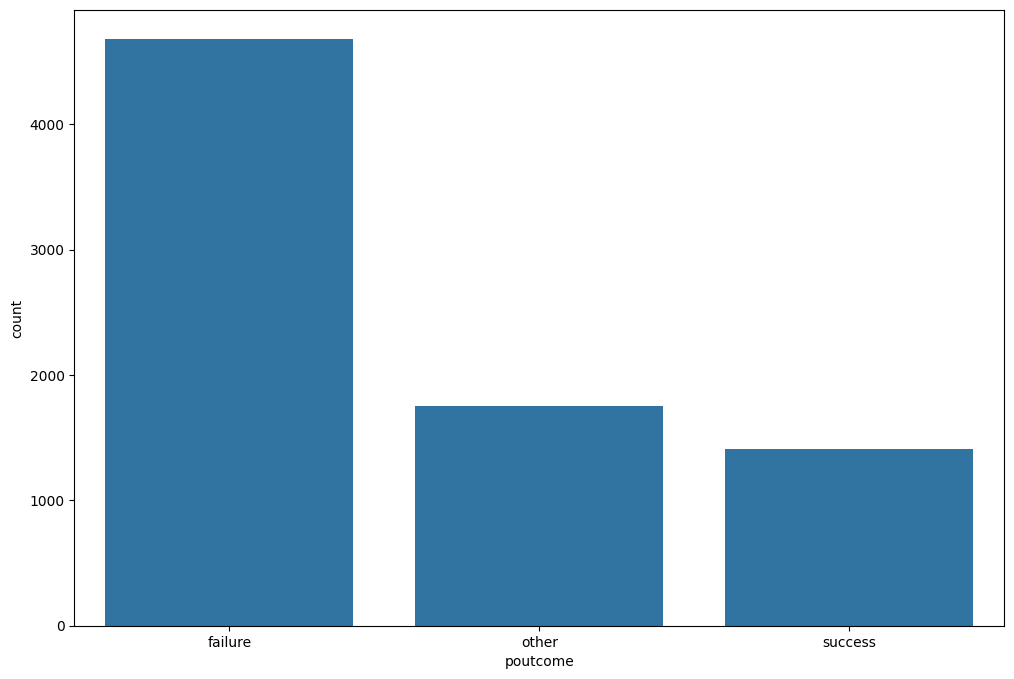

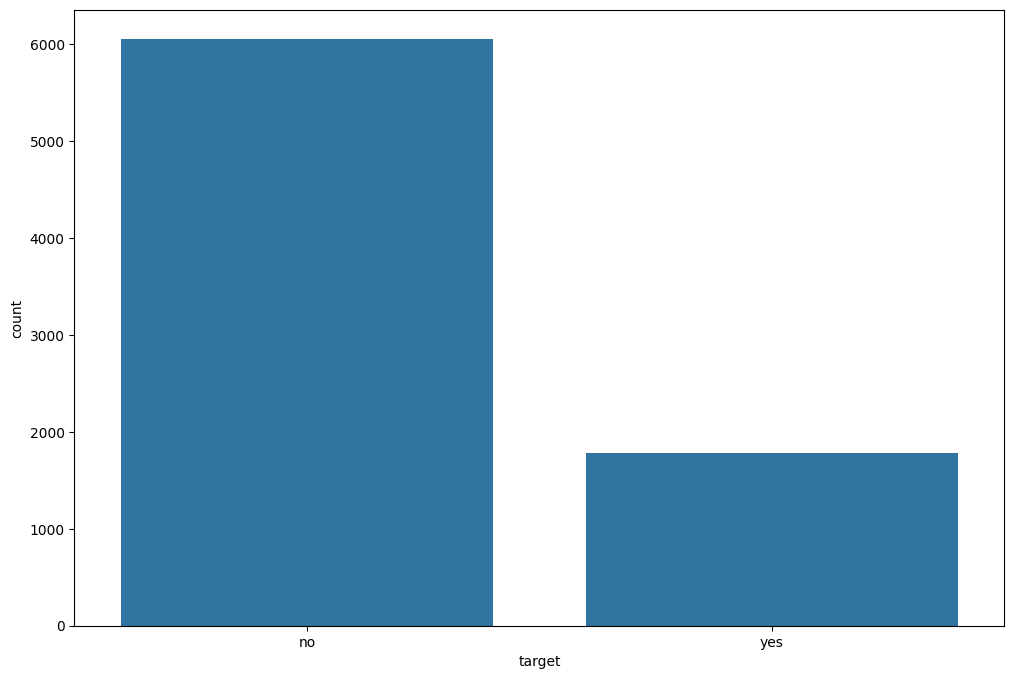

In [420]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns #almacenar nombres de columnas object y category

for col in categorical_cols: #plotear conteo de cada columna categorial
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col)
    plt.show()

In [421]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 

for col in df.select_dtypes(include=['object', 'category']).columns: # aplicar label encoding a columnas categoriales (llevar a números)
    df[col] = le.fit_transform(df[col])


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          7842 non-null   int64
 1   job          7842 non-null   int64
 2   marital      7842 non-null   int64
 3   education    7842 non-null   int64
 4   default      7842 non-null   int64
 5   balance      7842 non-null   int64
 6   housing      7842 non-null   int64
 7   loan         7842 non-null   int64
 8   contact      7842 non-null   int64
 9   day_of_week  7842 non-null   int64
 10  month        7842 non-null   int64
 11  duration     7842 non-null   int64
 12  campaign     7842 non-null   int64
 13  pdays        7842 non-null   int64
 14  previous     7842 non-null   int64
 15  poutcome     7842 non-null   int64
 16  target       7842 non-null   int64
dtypes: int64(17)
memory usage: 1.1 MB


In [423]:
df['target'].value_counts()

target
0    6056
1    1786
Name: count, dtype: int64

In [424]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfScaled = scaler.fit_transform(df) # estandarizar datos
df = pd.DataFrame(dfScaled, columns=df.columns) # dataframe con datos estandarizados

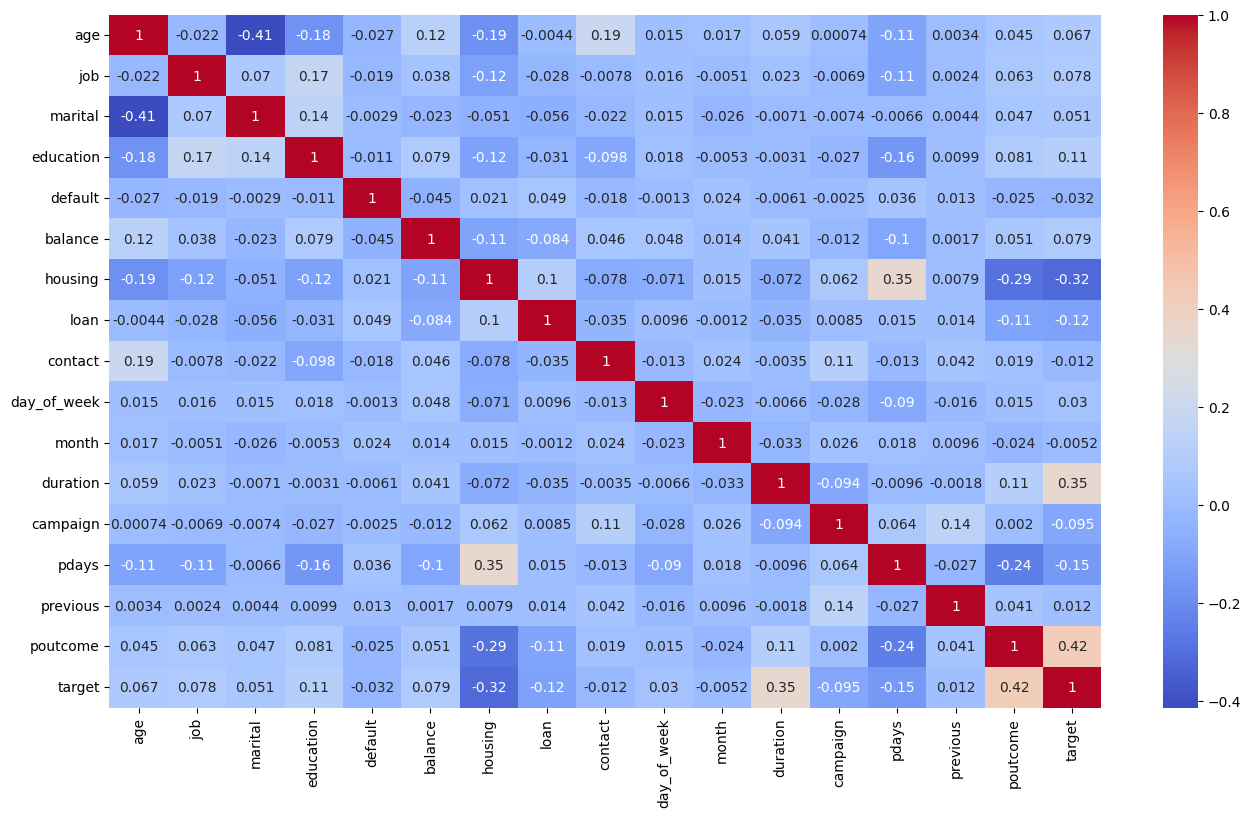

In [425]:
corr_matrix = df.corr(method = 'pearson') # crear matriz de correlacion 

plt.figure(figsize=(16,9))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm') # el annot es para los números
plt.show()

In [ ]:
# Ingenieria de atributos, nos quedamos con lo importante
corr_target = corr_matrix['target'].abs() # valores absolutos para comparar
selected_features = corr_target[corr_target > 0.1].index.drop('target') # nos quedamos con los que tengan una correlacion con el target mayor a 0.1 o inferior a -0.1

df_selected = df[selected_features.tolist() + ['target']] # nuevo dataframe con las columnas seleccionadas y el target
print("Características seleccionadas con correlación > 0.1:")
print(selected_features)

Características seleccionadas con correlación > 0.1:
Index(['education', 'housing', 'loan', 'duration', 'pdays', 'poutcome'], dtype='object')


<Axes: xlabel='pdays', ylabel='duration'>

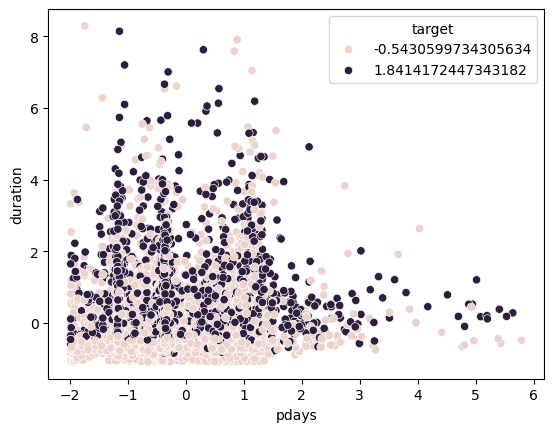

In [427]:
sns.scatterplot(x = df_selected['pdays'], y=df_selected['duration'], hue=df_selected['target']) #analisis binario de las variables que antes eran numericas (antes del label encoding)

## Modelos de ML

In [428]:
X = df_selected.drop(columns=['target']) #columnas menos target
y = df_selected['target'].astype(int) #target

In [429]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) #definir entrenamiento y prueba, el stratify es para que las proporciones del target sean parecidos

In [ ]:
# Definir todos los modelos a emplear modelos
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

resultados = {}

=== Regresión Logística ===
Accuracy: 0.8311
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1212
           1       0.67      0.51      0.58       357

    accuracy                           0.83      1569
   macro avg       0.77      0.72      0.74      1569
weighted avg       0.82      0.83      0.82      1569



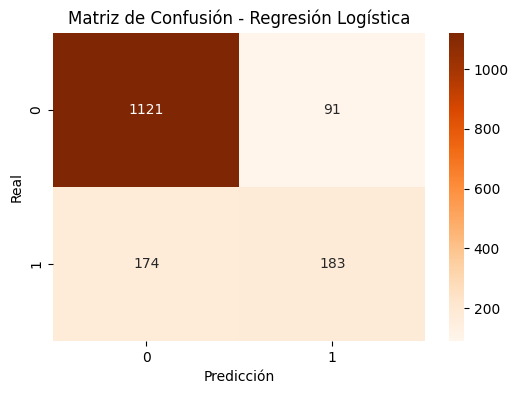

=== Random Forest ===
Accuracy: 0.8337
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1212
           1       0.65      0.59      0.62       357

    accuracy                           0.83      1569
   macro avg       0.76      0.75      0.76      1569
weighted avg       0.83      0.83      0.83      1569



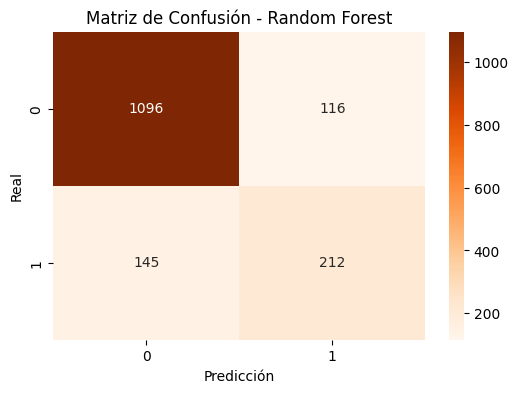

=== SVM ===
Accuracy: 0.8292
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1212
           1       0.65      0.55      0.59       357

    accuracy                           0.83      1569
   macro avg       0.76      0.73      0.74      1569
weighted avg       0.82      0.83      0.82      1569



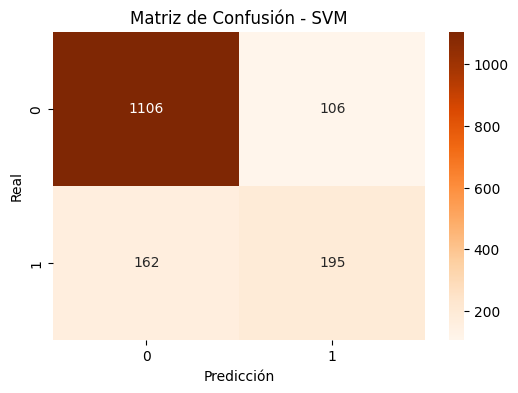

=== KNN ===
Accuracy: 0.8254
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1212
           1       0.63      0.57      0.60       357

    accuracy                           0.83      1569
   macro avg       0.75      0.74      0.74      1569
weighted avg       0.82      0.83      0.82      1569



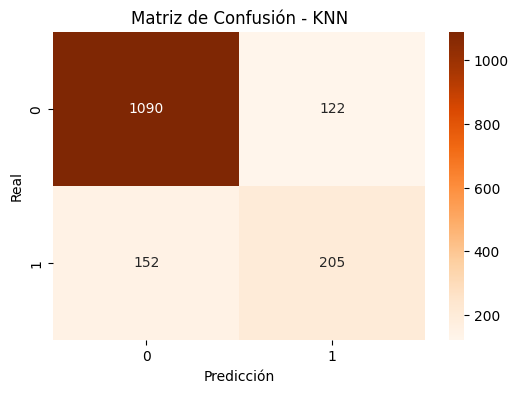

=== Naive Bayes ===
Accuracy: 0.8260
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1212
           1       0.62      0.63      0.62       357

    accuracy                           0.83      1569
   macro avg       0.75      0.76      0.75      1569
weighted avg       0.83      0.83      0.83      1569



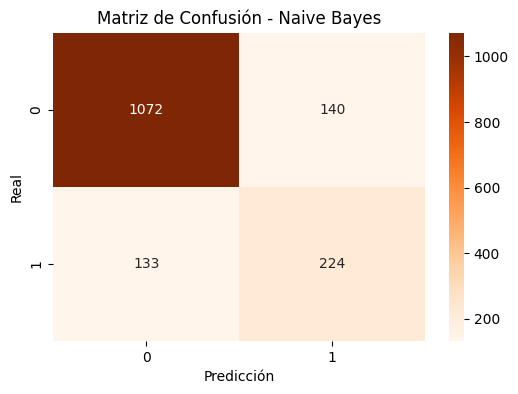

=== Gradient Boosting ===
Accuracy: 0.8521
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1212
           1       0.73      0.56      0.63       357

    accuracy                           0.85      1569
   macro avg       0.80      0.75      0.77      1569
weighted avg       0.84      0.85      0.85      1569



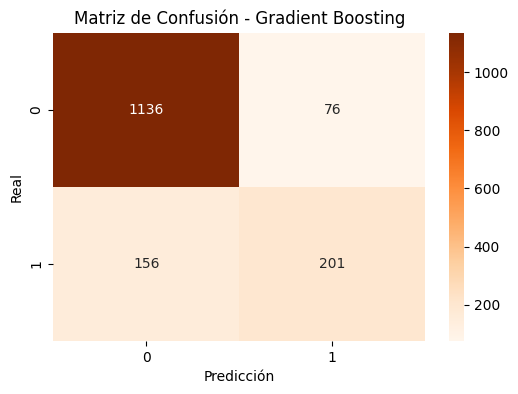

In [431]:
# Entrenar, predecir y evaluar cada modelo
for nombre, modelo in modelos.items():
    # entrenar
    modelo.fit(X_train, y_train)
    
    # predecir
    y_pred = modelo.predict(X_test)
    
    # evaluar
    acc = accuracy_score(y_test, y_pred)
    
    # ploteos e impresiones de valores
    print(f"=== {nombre} ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()
    resultados[nombre] = acc


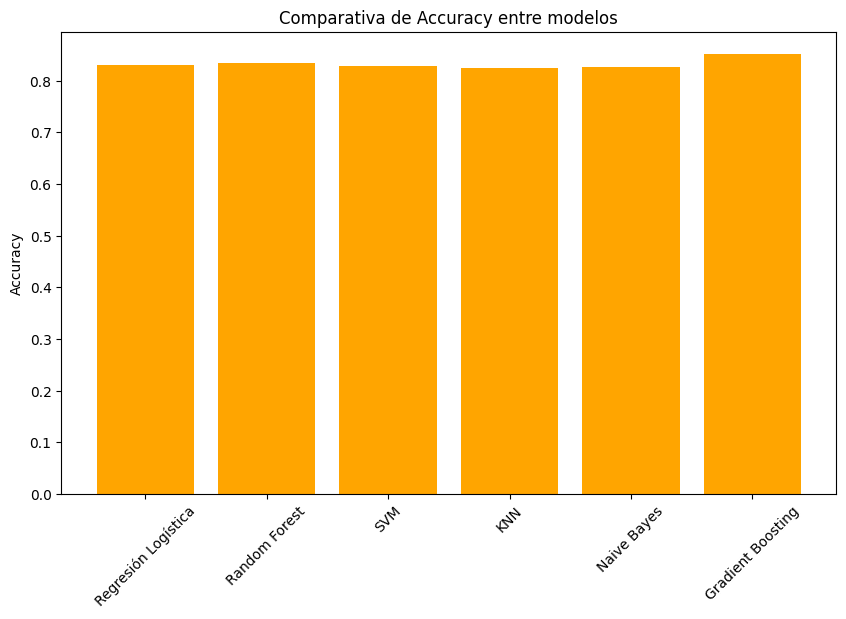

In [432]:
# Comparar accuracy entre modelos
plt.figure(figsize=(10,6))
plt.bar(resultados.keys(), resultados.values(), color='orange')
plt.ylabel('Accuracy')
plt.title('Comparativa de Accuracy entre modelos')
plt.xticks(rotation=45)
plt.show()

In [433]:
# Encontrar el modelo con mejor accuracy
mejor_modelo = max(resultados, key=resultados.get)
mejor_accuracy = resultados[mejor_modelo]

print(f"\n🎉 El modelo con mejor accuracy es: {mejor_modelo} con un accuracy de {mejor_accuracy:.4f} 🎉")


🎉 El modelo con mejor accuracy es: Gradient Boosting con un accuracy de 0.8521 🎉
